In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

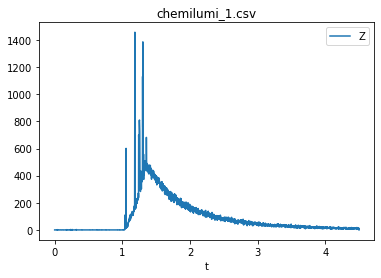

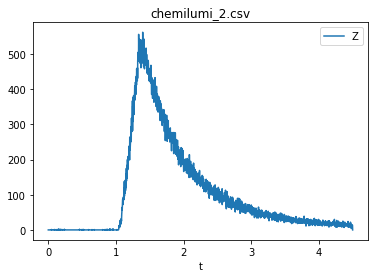

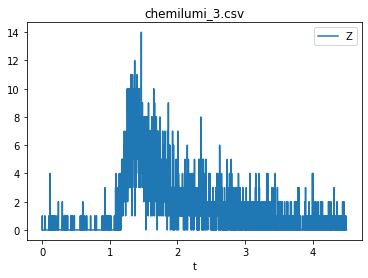

In [31]:
import pandas as pd

def read_data(filename, names=["Z"], fillTimestamps=True):
    df = pd.read_csv(filename, names=names)

    if fillTimestamps:
        ts = [index * 0.002 for index in df.index]
        df.insert(0, "t", ts)
        df.set_index("t", inplace=True)

    return df

fileList = ['chemilumi_{}.csv'.format(i + 1) for i in range(3)]
df = [read_data(path) for path in fileList]

import matplotlib.pyplot as plt
for i in range(len(df)):
    df[i].plot()
    plt.title(fileList[i])

In [32]:
fileList = ['chemilumi_{}.csv'.format(i + 1) for i in range(3)]

In [33]:
from scipy import signal
import scipy as sc

Text(0.5, 1.0, 'Z vs t (1)')

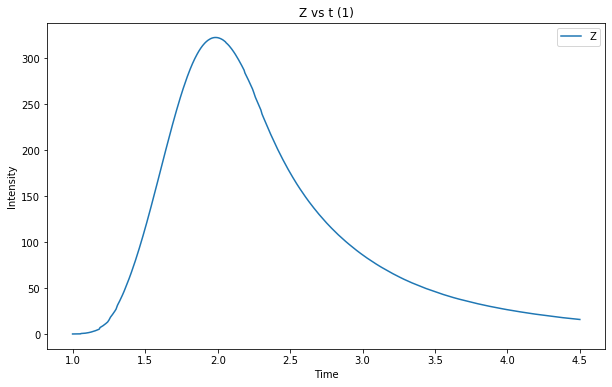

In [34]:
#filtering the noise from the data
df[0].rolling(500, win_type='gaussian').mean(std=df[0].std().mean()).plot(figsize=(10, 6))
d0=df[0].rolling(500, win_type='gaussian').mean(std=df[0].std().mean())
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('Z vs t (1)')

Text(0.5, 1.0, 'Z vs t (2)')

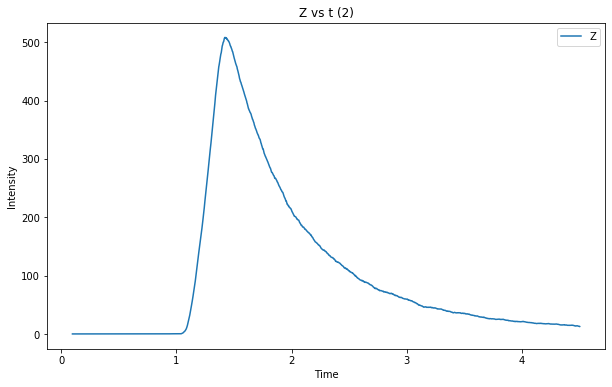

In [35]:
df[1].rolling(50, win_type=None).mean(std=df[1].std().mean()).plot(figsize=(10, 6))
d1=df[1].rolling(50, win_type=None).mean(std=df[1].std().mean())
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title('Z vs t (2)')

Text(0, 0.5, 'Intensity')

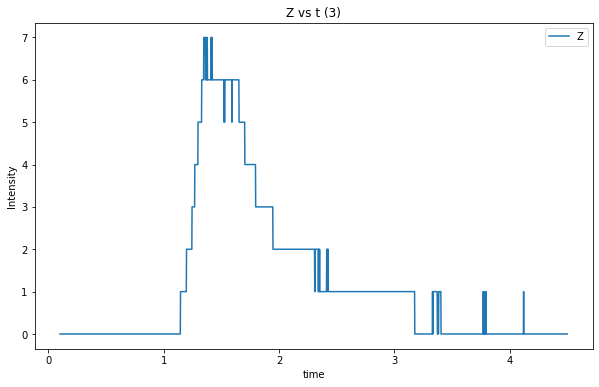

In [58]:
df[2].rolling(51).median().plot(figsize=(10, 6))
# d2=df[2].rolling(51).median(std=df[2].std().mean())
plt.title('Z vs t (3)')
plt.xlabel('time')
plt.ylabel('Intensity')

In [37]:
from scipy.integrate import simps
from numpy import trapz

In [38]:
d0['Z']=d0['Z'].fillna(0)
d1['Z']=d1['Z'].fillna(0)
d2['Z']=d2['Z'].fillna(0)
y = d0['Z'].values

In [39]:
#finding area under the curves of the three graphs using trapezoidal rule
area = trapz(y, dx=0.002)
print("area0 =", area)

area0 = 389.1180476818205


In [40]:
#area using simpsons rule, minor difference between both
area = simps(y, dx=0.002)
print("area0 =", area)

area0 = 389.11808295278536


In [41]:
y1 = d1['Z'].values
area = trapz(y1, dx=0.002)
print("area1 =", area)

area1 = 446.53178


In [42]:
y2 = d2['Z'].values
area = trapz(y2, dx=0.002)
print("area3 =", area)

area3 = 6.172773333333334


The given problem states that the area under the curve is proportional to the concentration of reactant X

The chemiluminescence reaction is a psuedo first order reaction where one reactant is in excess (Y)

By proportionality this gives us an equation Area(A)=m[Xo] or [Xo]=m.A : (0)

Using the general equation of Chemiluminescence reaction, we get a rate equation R1 (for X +Y -> Z*), R1=k1*[X]=-d[X]/dt

Also d[Z*]/dt=R1-R2 : (1), where R2 is the rate for the reaction Z*+Q->Z+hu(light) , and R2=d[hu]/dt

Since Intensity(I)=d[hu]/dt, now we can substitute R1,R2 in equation (1), d[Z*]/dt= d[X]/dt- I : (2)

Integrating equation (2) with respect to time, we get 0 = Xo - A where Xo=initial concentration of x 

Since Z* is intermediate, its integral over time becomes 0 on LHS, substituting the value of Xo from (0), we get R1=R2, m=1
Hence Xo = A i.e. the initial concentration of the reactant is the area under the intensity-time graph itself.

Since the chemiluminescence reaction is psuedo-first order as detailed by the theory, we also know that the concentration of X varies exponentially, [X]=Xo.e^(-k1(t-1)) :(3)

Also we know that R1=R2, so k[X]=I where both are functions varying with time,substituting X=I/k in eq (3), I=k1.Xo.e^(-k1(t-1)) :(4)

The equation (4) is also a function of time where the constant k is unknown which can be calculated by curve fitting

In [43]:
from scipy.optimize import curve_fit

In [44]:
#using data after a time limit(=1.4 here) so that the function can be estimated correctly
d0.drop(d0.index[0:700], inplace=True)
yval0=d0['Z']
xval0=d0.index.values
d0

,Z
t,
1.400,65.256772
1.402,66.123589
1.404,67.019223
1.406,67.916274
1.408,68.815223
...,...
4.492,15.969991
4.494,15.942784
4.496,15.904694


In [45]:
def func(x, a0, b0):
    return a0*(np.exp(-b0*(x-1)))
    #return an exponential function similar to equation (4)
 

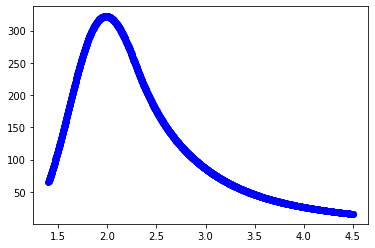

In [46]:
#plot of experimental data in desired time interval
plt.plot(xval0, yval0, 'bo', label='experimental-data')

In [47]:
popt, pcov = curve_fit(func, xval0, yval0)
print(popt, pcov)
#print optimized parameters a & b where a=k1.X0 and b=k1

[363.29720937   0.60801244] [[6.84673974e+01 1.22754567e-01]
 [1.22754567e-01 2.94252769e-04]]


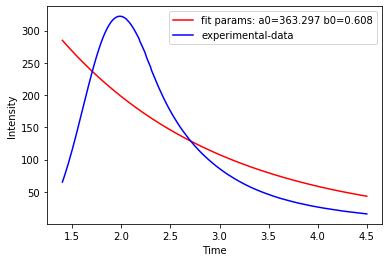

In [48]:
x_fit=xval0
#Plot the fitted function
cf0=func(xval0, *popt)
plt.plot(x_fit, func(x_fit, *popt), 'r', label='fit params: a0=%5.3f b0=%5.3f' % tuple(popt))
plt.plot(xval0, yval0, 'b', label='experimental-data')
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.legend()
plt.show()

In [49]:
d1.drop(d1.index[0:750], inplace=True)
yval1=d1['Z']
xval1=d1.index.values
d1

,Z
t,
1.500,474.66
1.502,472.52
1.504,471.40
1.506,469.80
1.508,468.50
...,...
4.492,13.16
4.494,13.16
4.496,13.10


[932.60345685   1.42955164] [[8.62416086e+00 9.33670582e-03]
 [9.33670582e-03 1.18031554e-05]]


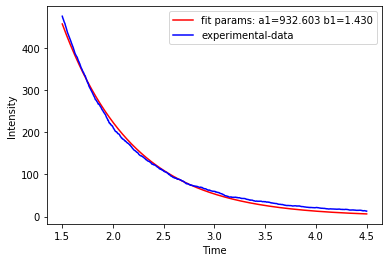

In [50]:
def func(x, a1, b1):
    return a1*(np.exp(-b1*(x-1)))

popt, pcov = curve_fit(func, xval1, yval1)
cf1=func(xval1, *popt)
print(popt, pcov)
x_fit=xval1
#Plot the fitted function
plt.plot(x_fit, func(x_fit, *popt), 'r', label='fit params: a1=%5.3f b1=%5.3f' % tuple(popt))
plt.plot(xval1, yval1, 'b', label='experimental-data')
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.legend()
plt.show()

In [51]:
d2.drop(d2.index[0:1000], inplace=True)
yval2=d2['Z']
xval2=d2.index.values
d2

,Z
t,
2.000,4.266667
2.002,4.250000
2.004,4.223333
2.006,4.213333
2.008,4.203333
...,...
4.492,0.426667
4.494,0.416667
4.496,0.413333


[11.32504732  1.10443927] [[9.15980789e-03 5.16331999e-04]
 [5.16331999e-04 3.16235546e-05]]


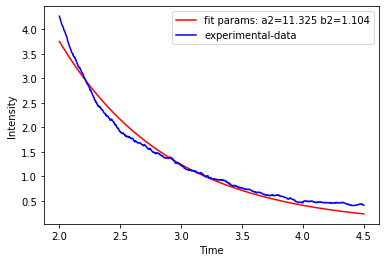

In [52]:
def func(x, a2, b2):
    return a2*(np.exp(-b2*(x-1)))
popt, pcov = curve_fit(func, xval2, yval2)
cf2=func(xval2, *popt)
print(popt, pcov)
x_fit2=xval2
#Plot the fitted function
plt.plot(x_fit2, func(x_fit2, *popt), 'r', label='fit params: a2=%5.3f b2=%5.3f' % tuple(popt))
plt.plot(xval2, yval2, 'b', label='experimental-data')
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.legend()
plt.show()

In [53]:
#Calculating r-squared error between the original function and the function estimated from curve-fitting
d1=cf1-yval1
d0=cf0-yval0
d2=cf2-yval2
res0=sum(d0**2)
res1=sum(d1**2)
res2=sum(d2**2)
tot0=sum((yval0-np.mean(yval0))**2)
tot1=sum((yval1-np.mean(yval1))**2)
tot2=sum((yval2-np.mean(yval2))**2)
r_square0=1-(res0/tot0)
r_square1=1-(res1/tot1)
r_square2=1-(res2/tot2)

In [54]:
print(r_square0, r_square1, r_square2)
#the r-squared errors are close to 1 implying that the curve is well-fitted

0.5778359646611696 0.9959258869970431 0.9793061470160254


In [55]:
#to get the value of k, taking average of the parameter b from all 3 dataframes, i.e. 1.181+1.430+1.528/3  = 1.379
#hence the concentration of reactant X with respect to time is [x]=X0*e^k(t-1) where X0=a/b
# for reaction 1 : X0=559.333 , k=1.379
# for reaction 2 : X0=652.169 , k=1.379
# for reaction 3 : X0=11.014  , k=1.379